In [1]:
import torch

In [2]:
torch.__version__

'1.5.1'

In [3]:
import numpy as np

In [4]:
lst=[3,6,8]
arr=np.array(lst)

In [6]:
arr.dtype

dtype('int32')

## CONVERT NUMPY TO PYTORCH TENSORS

In [7]:
tensors=torch.from_numpy(arr)
tensors

tensor([3, 6, 8], dtype=torch.int32)

In [8]:
### Indexing similar to numpy
tensors[2]

tensor(8, dtype=torch.int32)

In [9]:
tensors[1:4]

tensor([6, 8], dtype=torch.int32)

In [11]:
#### Disadvantage of from_numpy. The array and tensor uses the same memory location
tensors[2]=100

In [12]:
tensors

tensor([  3,   6, 100], dtype=torch.int32)

In [13]:
arr

array([  3,   6, 100])

In [14]:
### Prevent this by using torch.tensor
tensor_arr=torch.tensor(arr)
tensor_arr

tensor([  3,   6, 100], dtype=torch.int32)

In [16]:
tensor_arr[2]=120
print(tensor_arr)
print(arr)

tensor([  3,   6, 120], dtype=torch.int32)
[  3   6 100]


In [17]:
##zeros and ones
torch.zeros(2,3,dtype=torch.float64)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [18]:
torch.ones(2,3,dtype=torch.float64)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [34]:
a=torch.tensor(np.arange(0,15).reshape(5,3))

In [36]:
a[:,0:2]

tensor([[ 0,  1],
        [ 3,  4],
        [ 6,  7],
        [ 9, 10],
        [12, 13]], dtype=torch.int32)

# Arithmetic Operation

In [21]:
a = torch.tensor([3,4,5], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a + b)


tensor([ 7.,  9., 11.])


In [22]:
torch.add(a,b)

tensor([ 7.,  9., 11.])

In [23]:
c=torch.zeros(3)

In [24]:
torch.add(a,b,out=c)

tensor([ 7.,  9., 11.])

In [25]:
c

tensor([ 7.,  9., 11.])

In [26]:
##### Some more operations
a = torch.tensor([3,4,5], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)


In [27]:
### tensor[7,9,15]
torch.add(a,b).sum()


tensor(27.)

# Dot Products and Mult Operations


In [28]:
x= torch.tensor([3,4,5], dtype=torch.float)
y = torch.tensor([4,5,6], dtype=torch.float)

In [29]:
x.mul(y)

tensor([12., 20., 30.])

In [30]:
### 3*4+5*4+6*5
x.dot(y)

tensor(62.)

In [31]:
###### MAtrix Multiplication
x = torch.tensor([[1,4,2],[1,5,5]], dtype=torch.float)
y = torch.tensor([[5,7],[8,6],[9,11]], dtype=torch.float)
torch.matmul(x,y)

tensor([[55., 53.],
        [90., 92.]])

In [32]:
torch.mm(x,y)

tensor([[55., 53.],
        [90., 92.]])

In [33]:
x@y

tensor([[55., 53.],
        [90., 92.]])

# back propogation

y=x^2

In [37]:
import torch
x=torch.tensor(4.0,requires_grad=True)
x

tensor(4., requires_grad=True)

In [38]:
y=x**2
y

tensor(16., grad_fn=<PowBackward0>)

In [39]:
#### Back propogation y=2*x
y.backward()

In [40]:
print(x.grad)

tensor(8.)


In [41]:
lst=[[2.,3.,1.],[4.,5.,3.],[7.,6.,4.]]
torch_input=torch.tensor(lst,requires_grad=True)
torch_input

tensor([[2., 3., 1.],
        [4., 5., 3.],
        [7., 6., 4.]], requires_grad=True)

In [42]:
### y=x**3+x**2
### y=3x**2+2x--->
y=torch_input**3+torch_input**2
y

tensor([[ 12.,  36.,   2.],
        [ 80., 150.,  36.],
        [392., 252.,  80.]], grad_fn=<AddBackward0>)

In [43]:
z=y.sum()
z

tensor(1040., grad_fn=<SumBackward0>)

In [44]:
z.backward()
torch_input.grad

tensor([[ 16.,  33.,   5.],
        [ 56.,  85.,  33.],
        [161., 120.,  56.]])

# Creating An ANN using Pytorch

In [2]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


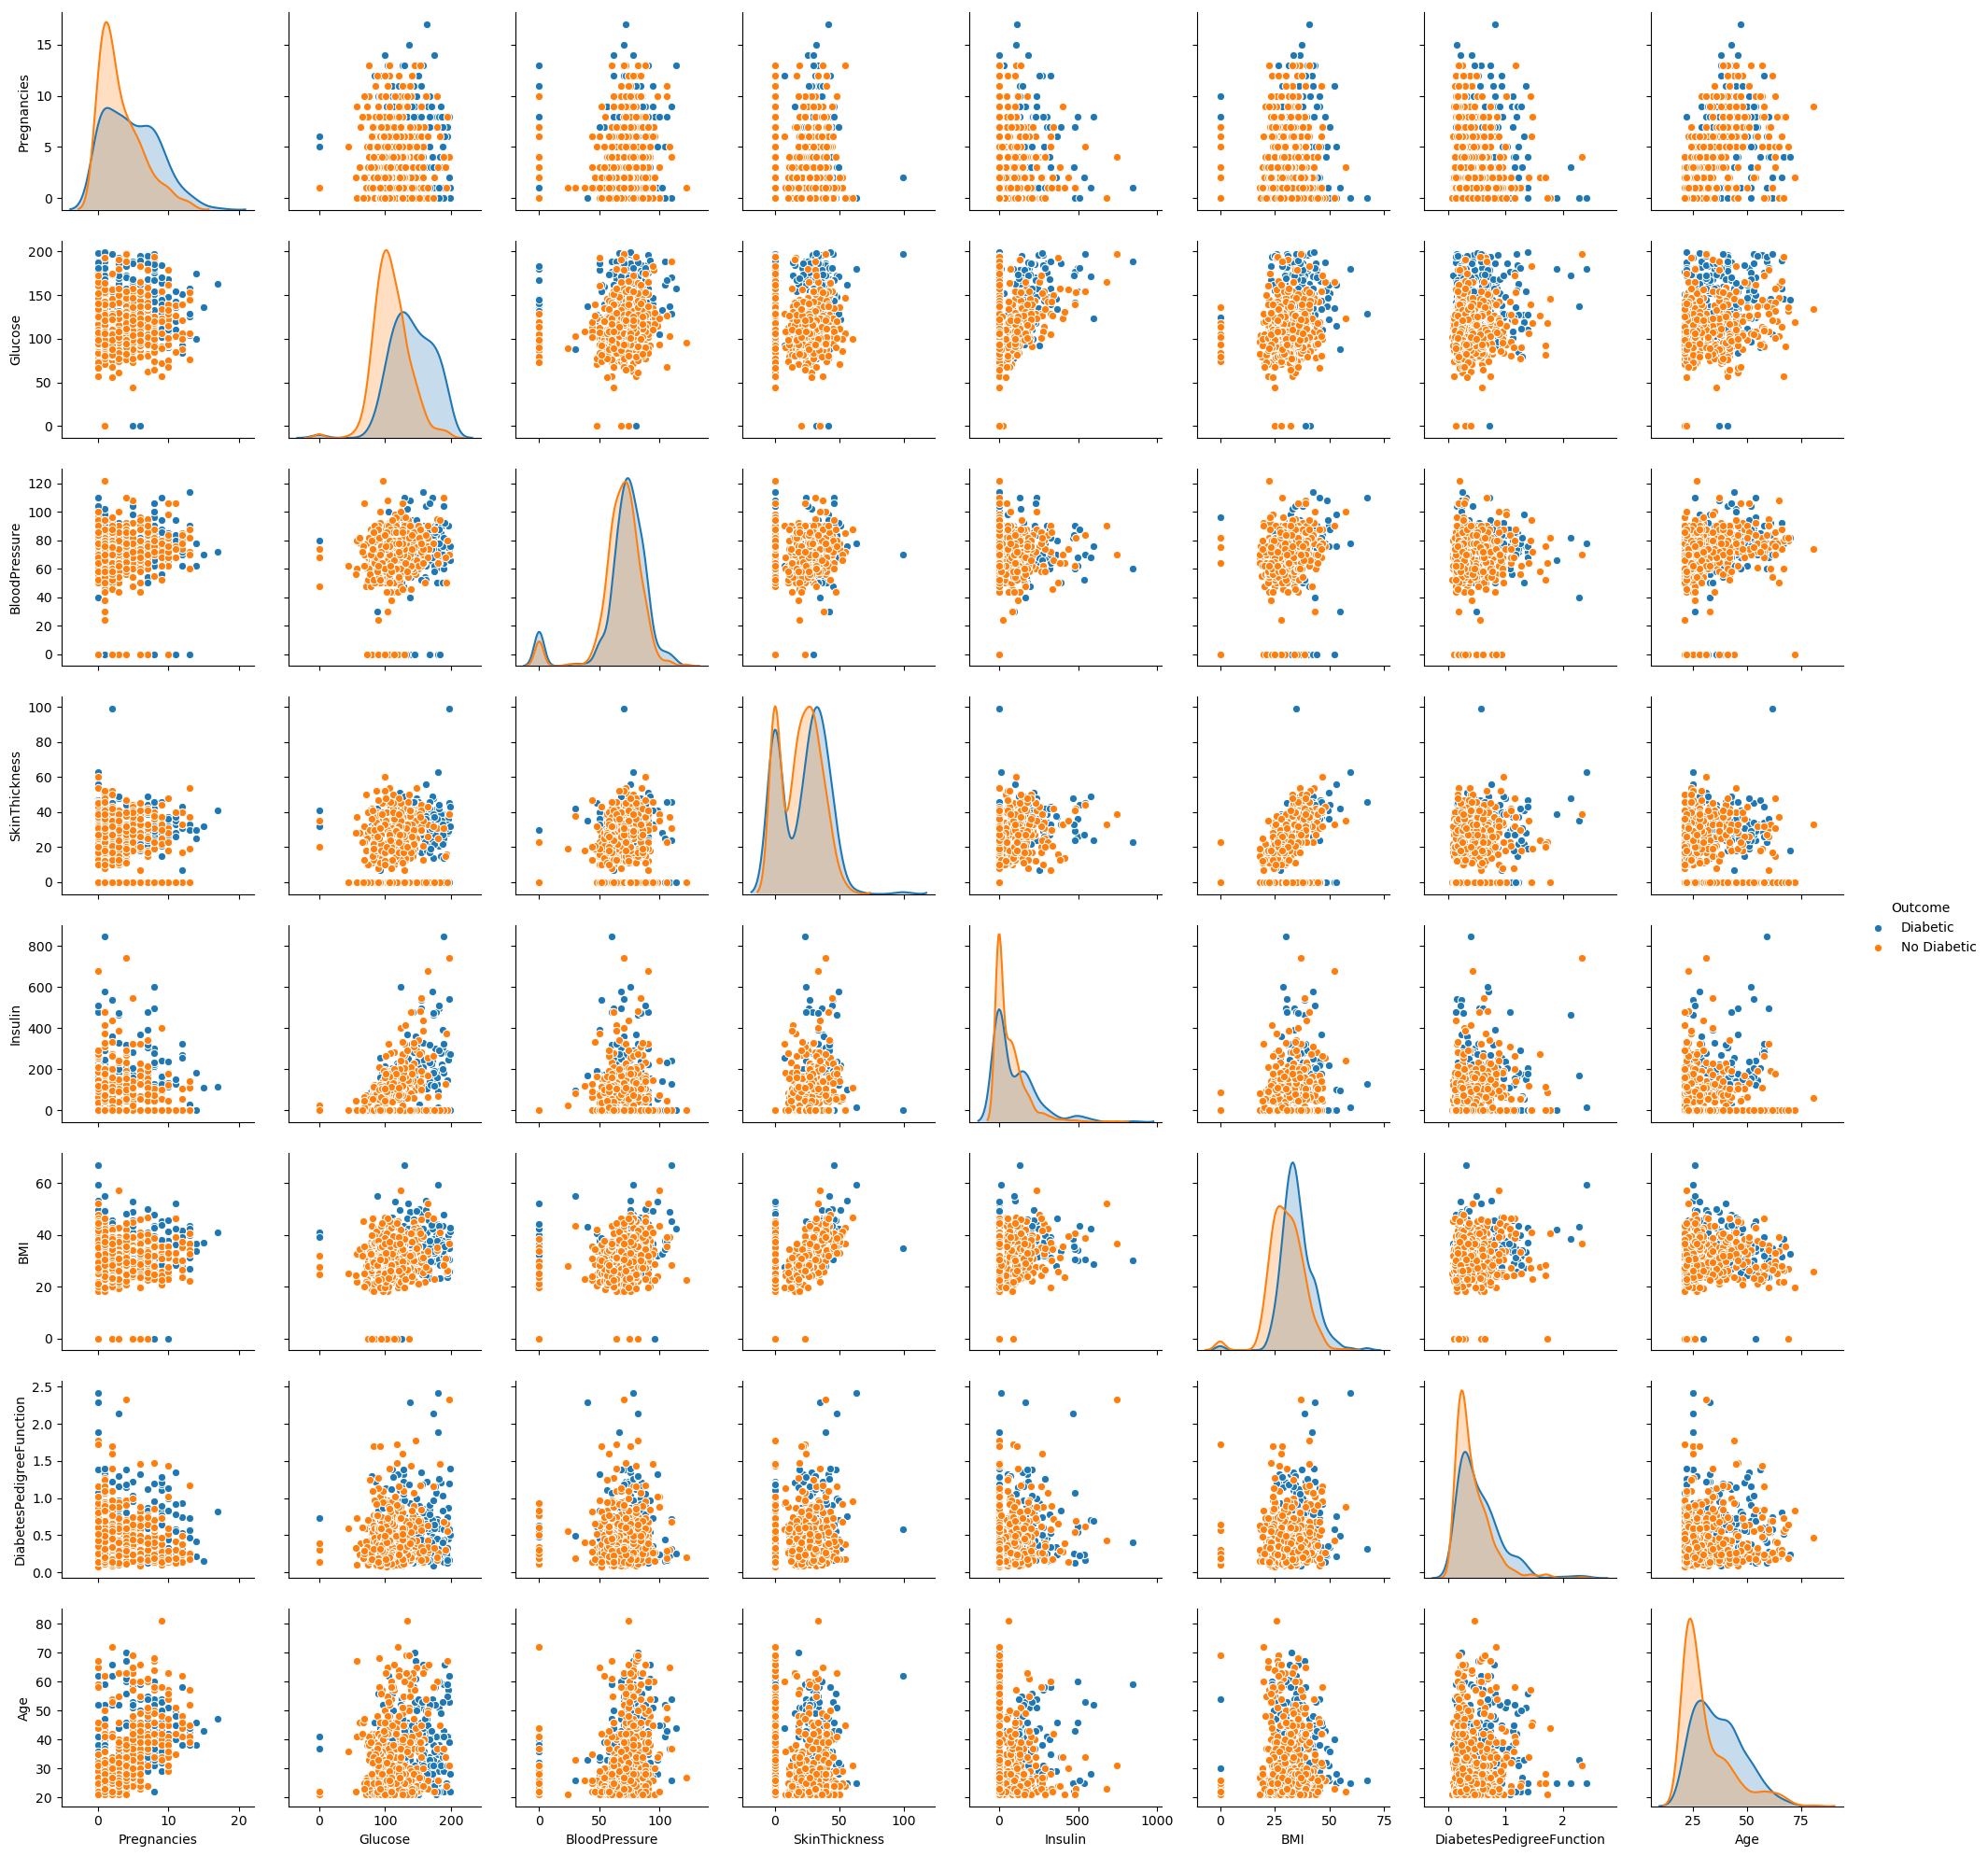

In [5]:
sns.pairplot(df,hue="Outcome")

In [6]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [9]:
df.shape

(768, 9)

In [10]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [11]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [12]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [13]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019211888313293
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917772054672241
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041290283203
Epoch number: 61 and the loss : 0.5410096049308777
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135971307754517
Epoch number: 101 and the loss : 0.5061255693435669
Epoch number: 111 and the loss : 0.4983412027359009
Epoch number: 121 and the loss : 0.4960547685623169
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.47560378909111023
Epoch number: 151 and the loss : 0.47992369532585144
Epoch number: 161 and the loss : 0.4792938232421875
Epoch number: 171 and the loss : 0.4649999141693115
Epoch number: 181 and the loss : 0.458202600479126
Epoch number: 191 and t

Text(0.5, 0, 'Epoch')

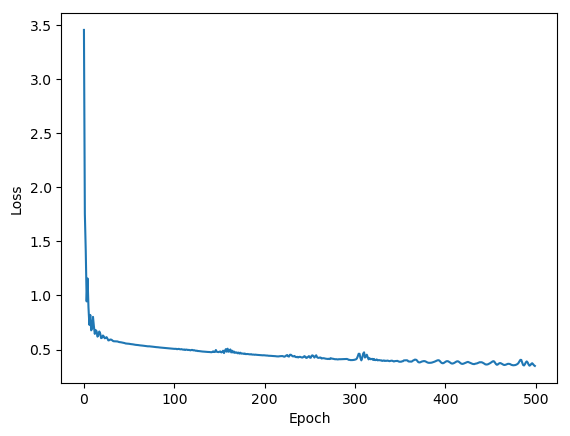

In [14]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [15]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[93, 14],
       [18, 29]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

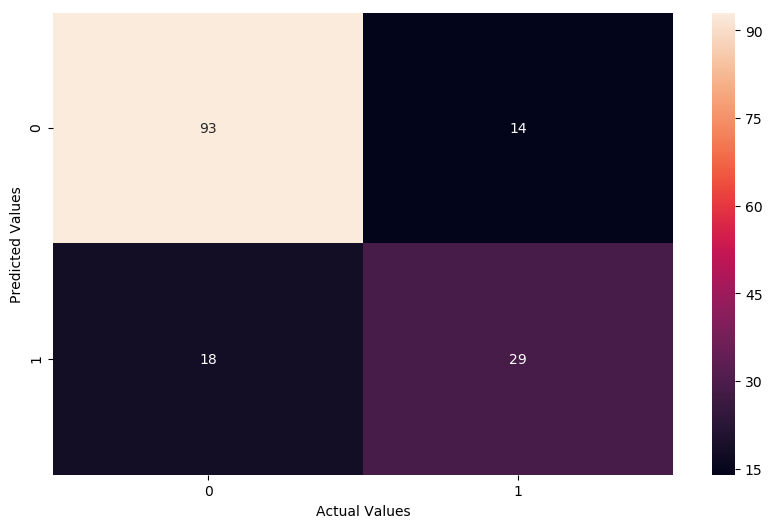

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [18]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [19]:
#### Save the model
torch.save(model,'diabetes.pt')
#### Save And Load the model
model=torch.load('diabetes.pt')

C:\Users\samat\anaconda3\envs\envpytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [20]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [21]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [22]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [23]:
new_data=torch.tensor(lst1)
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())


tensor([1.2133, 1.1058])
0
